# Titanic: Machine Learning from Disaster

## Start here! Predict survival on the Titanic and get familiar with ML basics

https://www.kaggle.com/c/titanic

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### 데이터셋 불러오기

In [6]:
train = pd.read_csv("dataset/train.csv", index_col="PassengerId")
test = pd.read_csv("dataset/test.csv")

print("Train shape : {0}".format(train.shape))
print("Test shape : {0}".format(test.shape))

train.head()

Train shape : (891, 11)
Test shape : (418, 11)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 데이터셋 살펴보기

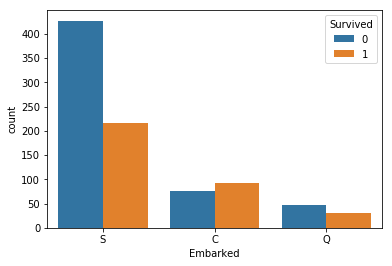

In [13]:
# S, C, Q 중에서 생존자가 높은 사람의 출신이 궁금하다.
sns.countplot(data=train, x="Embarked", hue="Survived")
# hue 는 두 개의 컬럼에 대해 바를 따로 그려준다.

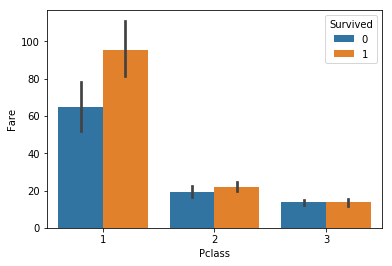

In [14]:
sns.barplot(data=train, x="Pclass", y="Fare", hue="Survived")
# 같은 등급에서도 Fare 를 더 많이 내는 사람일 수록 생존율이 높다는 것을 알 수 있다.

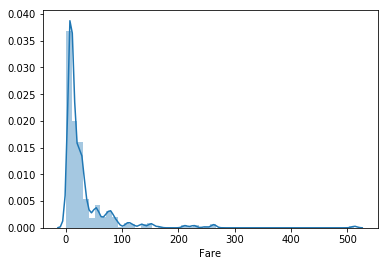

In [15]:
sns.distplot(train["Fare"])
# 운임요금에 관한 전반적인 분포를 알려준다.
# bar -> 히스토그램
# 선 -> kdplot

In [17]:
low_fare = train[train["Fare"] < 100]

# 위 운임요금 분포도를 참고하여 100 이하를 낮은 운임으로 정하였다.

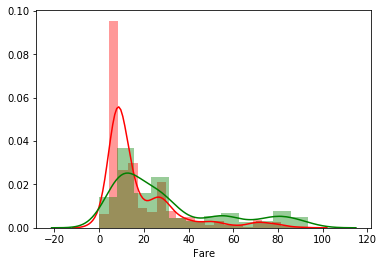

In [18]:
# 생존자의 운임 요금의 분포, 사망자의 운임 요금의 분포

perish = low_fare[low_fare["Survived"] == 0]
survived = low_fare[low_fare["Survived"] == 1]
sns.distplot(perish["Fare"], hist=True, label="Perish", color="r")
sns.distplot(survived["Fare"], hist=True, label="Survived", color="g")

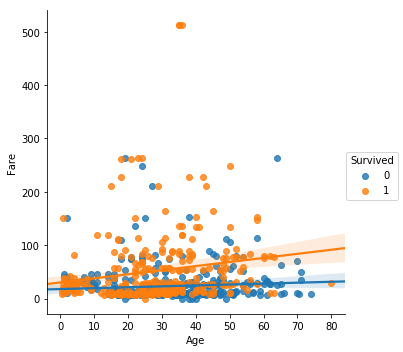

In [19]:
sns.lmplot(data=train, x="Age", y="Fare", hue="Survived")

# 운임과 연령대 사망여부